# ![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend.

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

# Let's see how the first 10 rows of the dataset look

In [9]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
schools = pd.read_csv("schools.csv")

# Preview the data
schools.head(10)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
5,Bard High School Early College,Manhattan,M097,634,641,639,70.8
6,Urban Assembly Academy of Government and Law,Manhattan,M445,389,395,381,80.8
7,Marta Valle High School,Manhattan,M025,438,413,394,35.6
8,University Neighborhood High School,Manhattan,M446,437,355,352,69.9
9,New Design High School,Manhattan,M445,381,396,372,73.7


# EDA

## Exploring Dataset Dimensions

We ensure there are no duplicate values in the dataset to facilitate easier and more accurate analysis.

In [10]:
# How we see, we have 375 rows and 7 columns thats a lot
fs=schools.shape
print('Original shape : {}'.format(fs))

#Dropping duplicate values
df = schools.drop_duplicates()

# How we see, now we have 375 rows and 7 columns thats a lot
ns= schools.shape
print('There were {} duplicates'.format((fs[0])-(ns[0])))
print('New shape : {}'.format(ns))

Original shape : (375, 7)
There were 0 duplicates
New shape : (375, 7)


In [11]:
#More information about the dataset and the data type of each column
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


## check if we have null values
As you can see, there are null values in the "percent_tested" column. We have the option to either drop these null values or, in my case, leave them as they are since we won't be utilizing this column for the current project.

In [12]:
#check if we have any nulls in the dataset
schools.isnull().sum()

school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64

In [13]:
#Metrics of the distribution of all numeric features in the dataset
schools.describe().T

,count,mean,std,min,25%,50%,75%,max
average_math,375.0,432.944000,71.952373,317.0,386.00,415.0,458.5,754.0
average_reading,375.0,424.504000,61.881069,302.0,386.00,413.0,445.0,697.0
average_writing,375.0,418.458667,64.548599,284.0,382.00,403.0,437.5,693.0
percent_tested,355.0,64.976338,18.747634,18.5,50.95,64.8,79.6,100.0


In [14]:
schools.nunique()

school_name        375
borough              5
building_code      233
average_math       173
average_reading    165
average_writing    162
percent_tested     275
dtype: int64

In [15]:
schools["borough"].value_counts()

borough
Brooklyn         109
Bronx             98
Manhattan         89
Queens            69
Staten Island     10
Name: count, dtype: int64

In [17]:
schools[["average_math", "average_reading", "average_writing"]].agg([np.mean, np.min, np.max])

,average_math,average_reading,average_writing
mean,432.944,424.504,418.458667
min,317.000,302.000,284.000000
max,754.000,697.000,693.000000


# Which NYC schools have the best math results?

The best math results are at least 80% of the *maximum possible score of 800* for math.

In [18]:
percentage80math = (800//100)*80
percentage80math

640

## Top Math Schools order by Average Math Score

In [23]:
best_math_schools = schools[schools["average_math"] >= percentage80math]
print("There are {} schools that have achieved 80% or more of the maximum possible score".format(best_math_schools.shape))
best_math_schools.head(10)

There are (10, 7) schools that have achieved 80% or more of the maximum possible score


,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
45,Eleanor Roosevelt High School,Manhattan,M855,641,617,631,86.0
68,"High School for Mathematics, Science, and Engi...",Manhattan,M812,683,610,596,92.6
88,Stuyvesant High School,Manhattan,M477,754,697,693,97.4
93,Staten Island Technical High School,Staten Island,R440,711,660,670,99.7
170,Bronx High School of Science,Bronx,X445,714,660,667,97.0
174,High School of American Studies at Lehman College,Bronx,X905,669,672,672,91.8
280,Brooklyn Technical High School,Brooklyn,K430,682,608,606,95.5
333,Townsend Harris High School,Queens,Q515,680,640,661,97.1
365,Queens High School for the Sciences at York Co...,Queens,Q774,701,621,625,97.9


In [32]:
best_math_schools = best_math_schools[["school_name", "average_math"]].sort_values("average_math", ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


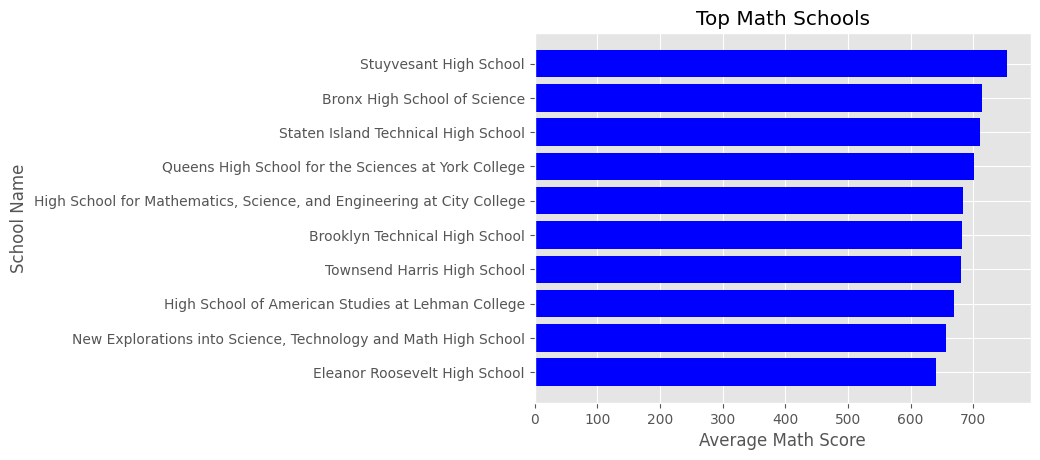

In [33]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.barh(best_math_schools['school_name'],best_math_schools['average_math'],color='blue' )
ax.set_title('Top Math Schools')
ax.set_xlabel('Average Math Score')
ax.set_ylabel('School Name')
plt.gca().invert_yaxis()
plt.show()

# What are the top 10 performing schools based on the combined SAT scores?

First, we need to calculate the combined SAT score, which is equal to the sum of the average scores for every subject across all schools.

In [34]:
schools["total_SAT"] = schools[["average_math", "average_reading", "average_writing"]].sum(axis=1)
schools.head()

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested,total_SAT
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN,1859
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9,1193
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1,1261
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9,1529
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7,1197


##Top 10 Schools by Average Performance

In [39]:
#Then all we need to do is order the dataframe by the total SAT score and return only the top 10 records.
top_10_schools = schools[["school_name", "total_SAT"]].sort_values("total_SAT", ascending = False).head(10)
top_10_schools

,school_name,total_SAT
88,Stuyvesant High School,2144
170,Bronx High School of Science,2041
93,Staten Island Technical High School,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


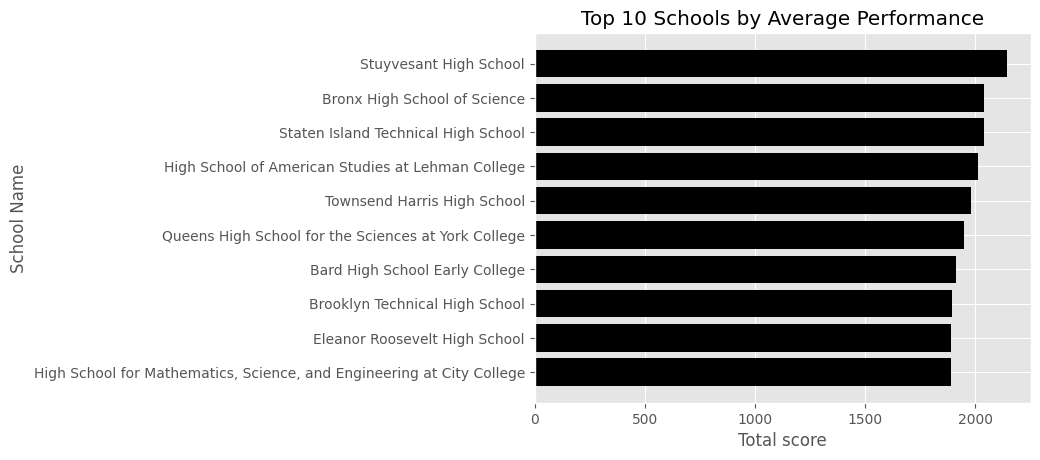

In [40]:
fig, ax = plt.subplots()
ax.barh(top_10_schools['school_name'],top_10_schools['total_SAT'],color='black' )
ax.set_title('Top 10 Schools by Average Performance')
ax.set_xlabel('Total score')
ax.set_ylabel('School Name')
plt.gca().invert_yaxis()
plt.show()

# Which single borough has the largest standard deviation in the combined SAT score?

To accomplish this, we first need to group the data by borough, filter by the total SAT score, aggregate the functions count, mean, and std, round the results, and then sort by the std values to obtain the highest value in the std column.

In [61]:
var = schools.groupby('borough')["total_SAT"].agg(['count', np.mean, np.std]).round(2).sort_values("std", ascending=False)
var

Text(0, 0.5, 'total SAT')

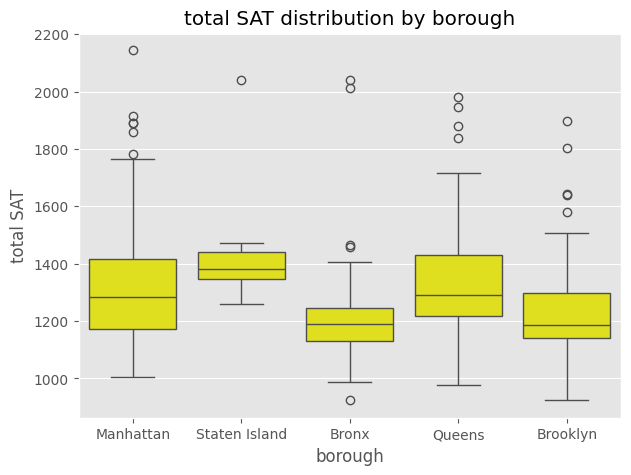

In [65]:
plt.figure(figsize=(7,5))
sns.boxplot(x='borough', y='total_SAT', data=schools, color='yellow')
plt.title('total SAT distribution by borough')
plt.xlabel('borough')
plt.ylabel('total SAT')

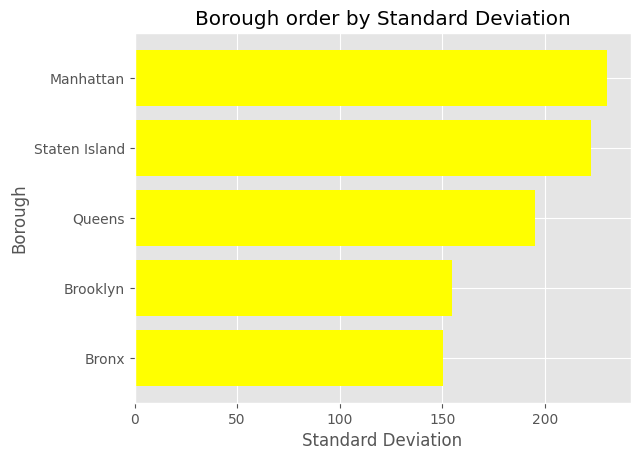

In [56]:
fig, ax = plt.subplots()
ax.barh(var.index,var['std'],color='yellow' )
ax.set_title('Borough order by Standard Deviation')
ax.set_xlabel('Standard Deviation')
ax.set_ylabel('Borough')
plt.gca().invert_yaxis()
plt.show()

## borough with the largest standard deviation in the combined SAT score

In [57]:
largest_std_dev = var.head(1)
largest_std_dev.columns=["num_schools", "average_SAT", "std_SAT"]
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29
